## Import necessary libraries

In [1]:
import os
import pandas as pd
from pandas import Series, DataFrame

### merging 12 months of sales data into a single file

In [ ]:
cwd = os.path.abspath('') #shows the location of where you are currently running your jupyter notebook
files = os.listdir(cwd)  # shows all the files in your current working directory

In [ ]:
# ONE WAY OF MERGING CSV FILES
df = pd.DataFrame()#an empty dataframe
for file in files:
    if file.endswith('.csv'):
        df = df.append(pd.read_csv(file), ignore_index= True) 
df.head() 
df.to_csv('total_sales.csv', index = False)

In [ ]:
#files = [file for file in os.listdir('C:\\Users\\Ige\\Personal Projects\\Keith Galli')]

#all_month_data = pd.DataFrame()

#for file in files:
#    if file.endswith('.csv'):
#        df = pd.read_csv('C:\\Users\\Ige\\Personal Projects\\Keith Galli' + file)
#        all_month_data = pd.concat([all_month_data, df])
#    
#all_month_data.head()

#### Read in the updated dataframe

In [2]:
total_sales = pd.read_csv("total_sales.csv")
total_sales.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
total_sales.dropna(axis=0, how='all', inplace=True)

In [4]:
total_sales.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [5]:
total_sales.shape

(186305, 6)

In [6]:
total_sales.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

# Augumenting data with more columns

#### Adding a month column

In [9]:
total_sales['month'] = total_sales['Order Date'].str[0:2]# this is taking the first two characters in the order date column
total_sales['month'] = total_sales['month'].astype('int32')# further analysis show that OR is part of the first two characters so it has to be removed

total_sales.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [8]:
total_sales = total_sales[total_sales['Order Date'].str[0:2] != 'Or']#this will make sure or is no more in the order date row
total_sales.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


Because the column needed for the analysis below is an object, we won't be able to continue, thus we need to convert it to an integer column.

In [ ]:
#total_sales['Quantity Ordered'].astype('float'). This syntax works but i want to use another syntax
#total_sales['Price Each'].astype('float')

#### Converting to integer and/or float

In [10]:
total_sales['Quantity Ordered'] = pd.to_numeric(total_sales['Quantity Ordered']) #Make int
total_sales['Price Each'] = pd.to_numeric(total_sales['Price Each']) # Make float

In [11]:
total_sales['Sales'] = total_sales['Quantity Ordered'] * total_sales['Price Each']
total_sales.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## Question 1: What was the best month for sales? How much was earned?

In [12]:
total_sales.groupby('month')['Sales'].sum().sort_values(ascending = False)

month
12    4.613443e+06
10    3.736727e+06
4     3.390670e+06
11    3.199603e+06
5     3.152607e+06
3     2.807100e+06
7     2.647776e+06
6     2.577802e+06
8     2.244468e+06
2     2.202022e+06
9     2.097560e+06
1     1.822257e+06
Name: Sales, dtype: float64

#### OR we do it the following way 

In [13]:
results = total_sales.groupby('month').sum()
results

,Quantity Ordered,Price Each,Sales
month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


## Plotting the above

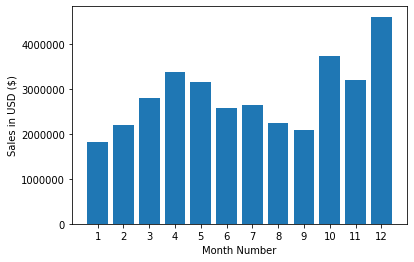

In [14]:
import matplotlib.pyplot as plt
months = range(1, 13) #giving our graph a range
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()

## Question 2: What U.S.A. city had the highest number of sales

In [ ]:
#df2 = df["Address"].apply(lambda x: x.split(","))
#city = df2.apply(lambda x: " ".join(x[0].split()[1:]))
#state = df2.apply(lambda x: x[1].split()[0])
#result = pd.DataFrame(zip(city, state), columns=["city", "state"])

We will have to extract the city from purchase address column. The code i used to write the code below is commented out above

In [15]:
total_sales['city'] = total_sales['Purchase Address'].apply(lambda x: x.split(',')[1])
#the first x after lambda means the cell contents or variable of the column, so x.split means we want to split the contents by a comma
# and we do [1] meaning we want the second content

## OR

In [15]:
def get_city(address) :
    return address.split(',')[1]#[1] means the second element of the string after it has been split

# Adding state to the column because two different cities from two different states can overlap
# so we are getting the city and state
def get_state(address) :
    return address.split(',')[2].split(' ')[1]# the extra split is to get rid of the whitespace and remove zipcode

total_sales['city'] = total_sales['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')

In [16]:
total_sales.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [17]:
results = total_sales.groupby('city').sum()
results

,Quantity Ordered,Price Each,month,Sales
city,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


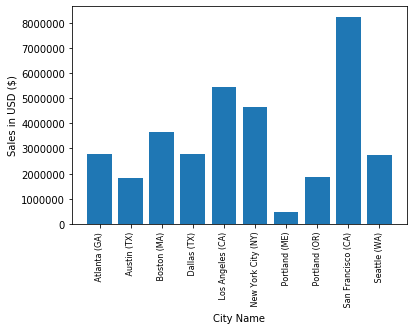

In [18]:
cities = [city for city, df in total_sales.groupby('city')]
plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

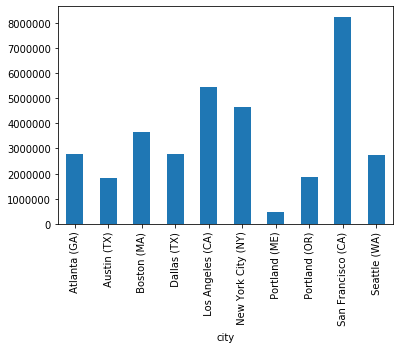

In [19]:
total_sales.groupby('city')['Sales'].sum().plot(kind = 'bar')

# Question 3: What time should we display advertisment to maximize likelyhood of buying the product

In [20]:
total_sales.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [23]:
import datetime
total_sales['Order Date'] = pd.to_datetime(total_sales['Order Date'])
total_sales['hour'] = pd.to_datetime(total_sales['Order Date'], format='%H:%M:%S').dt.hour

In [24]:
total_sales.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


Text(0.5, 1.0, 'Histogram of hour')

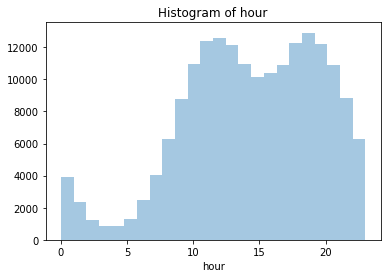

In [25]:
import seaborn as sns
sns.distplot(total_sales["hour"], kde = False, bins = 24).set_title("Histogram of hour")

In [28]:
total_sales.groupby('hour')['Sales'].sum().sort_values(ascending = False)

hour
19    2412938.54
12    2316821.34
11    2300610.24
20    2281716.24
18    2219348.30
13    2155389.80
17    2129361.61
14    2083672.73
21    2042000.86
10    1944286.77
15    1941549.60
16    1904601.31
9     1639030.58
22    1607549.21
8     1192348.97
23    1179304.44
7      744854.12
0      713721.27
1      460866.88
6      448113.00
2      234851.44
5      230679.82
4      162661.01
3      145757.89
Name: Sales, dtype: float64

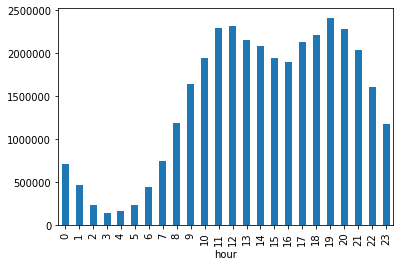

In [32]:
total_sales.groupby('hour')['Sales'].sum().plot(kind = 'bar')

# Question 4: What products are most often sold together

In [40]:
#The first thing we can do is check the order id or delivery address and see those with the same values, then pull out all duplicates
df = total_sales[total_sales['Order ID'].duplicated(keep = False)]

#Now we join the products together into one column
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
#transform is like apply function. So we say separate them by commas and join together



#Now, we will have duplicated rows in the grouped column because we have used the join function, so we need to drop the duplicates


df = df[['Order ID', 'Grouped']].drop_duplicates()
##Now, all duplicates are dropped


df.head(10)

C:\Users\Ige\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [41]:
df['Grouped'].value_counts()

iPhone,Lightning Charging Cable                       882
Google Phone,USB-C Charging Cable                     856
iPhone,Wired Headphones                               361
Vareebadd Phone,USB-C Charging Cable                  312
Google Phone,Wired Headphones                         303
                                                     ... 
Google Phone,USB-C Charging Cable,27in FHD Monitor      1
Google Phone,27in 4K Gaming Monitor                     1
LG Dryer,Lightning Charging Cable                       1
LG Dryer,Vareebadd Phone                                1
iPhone,Lightning Charging Cable,Flatscreen TV           1
Name: Grouped, Length: 366, dtype: int64

In [45]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df['Grouped'] :
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))#2 here means the 2 most commonly sold items together

    
#To create a less messy list use the below
#count.most_common(10)
#OR
for key, value in count.most_common(10):
    print(key, value)
#print(count) This is messy

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# Question 5: What product sold the most

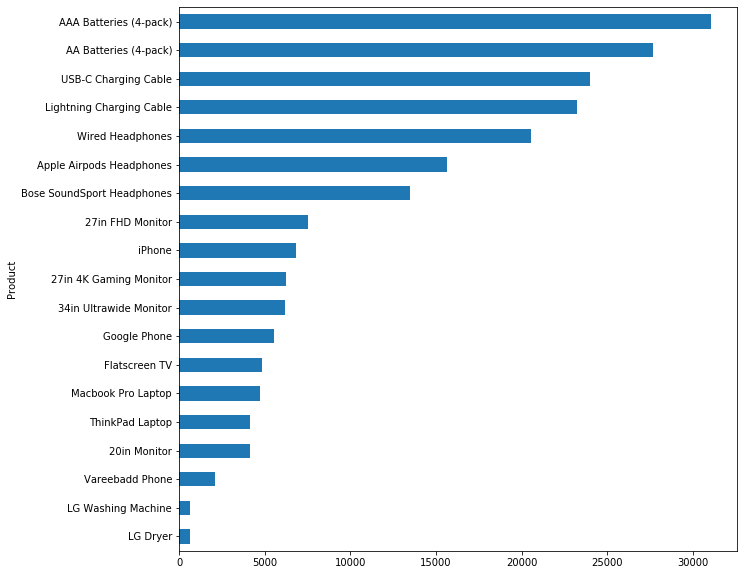

In [53]:
total_sales.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending = True).plot(kind = 'barh', figsize=(10,10))

### Why is triple A batteries the most sold

We can come up with an hypotesis and say it is because it is very cheap. To find if its cheap, we can find the average price of all the products

In [54]:
prices = total_sales.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

We can see that triple A batteries average price is 2.99, so now lets plot its graph over the previous graph

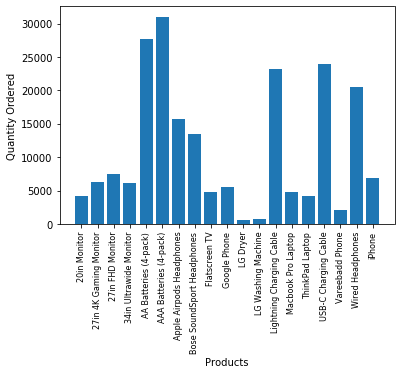

In [65]:
product_group = total_sales.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.xticks(products, rotation = 'vertical', size = 8)
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'set_xtickslabels'

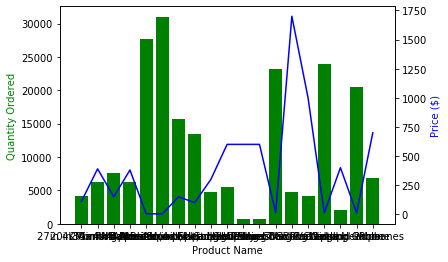

In [63]:
prices = total_sales.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Price ($)', color = 'b')
ax1.set_xtickslabels(products, rotation = 'vertical', size = 8)

plt.show()





In [59]:
pip install set_xtickslabels

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement set_xtickslabels (from versions: none)
ERROR: No matching distribution found for set_xtickslabels
